<a href="https://colab.research.google.com/github/likhith-kumarn/Data_Science/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naives Bayes Classifier is supervised machine learning algorithm based on Bayes Theorem.

Goal: The primary goal of this project was to classify different species of Iris flowers (specifically Setosa, Versicolor, and Virginica) based on their physical measurements.

Objectives:

Data Loading and Initial Exploration: Load the Iris dataset and perform initial checks like viewing its shape, columns, and checking for missing values.
Exploratory Data Analysis (EDA): Understand the distribution of features and relationships between variables using visualizations like histograms, box plots, and pair plots.
Feature Extraction: Separate the features (sepal length, sepal width, petal length, petal width) from the target variable (variety).
Data Splitting: Divide the dataset into training and testing sets to train and evaluate the model effectively.
Model Training: Train a Gaussian Naive Bayes classifier on the training data.
Model Evaluation: Assess the model's performance using metrics such as accuracy score, confusion matrix, and classification report on both training and test datasets.

Results: The project successfully developed and evaluated a Gaussian Naive Bayes classifier for Iris species classification. The model achieved an outstanding accuracy of 100% on the test dataset, indicating that it can perfectly distinguish between the different Iris varieties based on the given features. The classification report also confirmed high precision, recall, and f1-scores for all classes.

In [ ]:
#naives Bayes Classifier (NLP) : Supervised machine learning algorithm on Bayes theorem
# Classification model(multi classification): Text Classification
# Guassian NB
# Bayes theorem
# P(A/B) = P(A).P(B/A/P(Total))

In [1]:
# use case : classifying different species of iris flower dataset based on sepal and petal length and width
# using Naives Bayes Theorem
# setosa(small),verginica(medium),versicolor(large)

import pandas as pd
df=pd.read_csv("/content/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [5]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.isnull().any()

,0
sepal.length,False
sepal.width,False
petal.length,False
petal.width,False
variety,False


In [7]:
df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


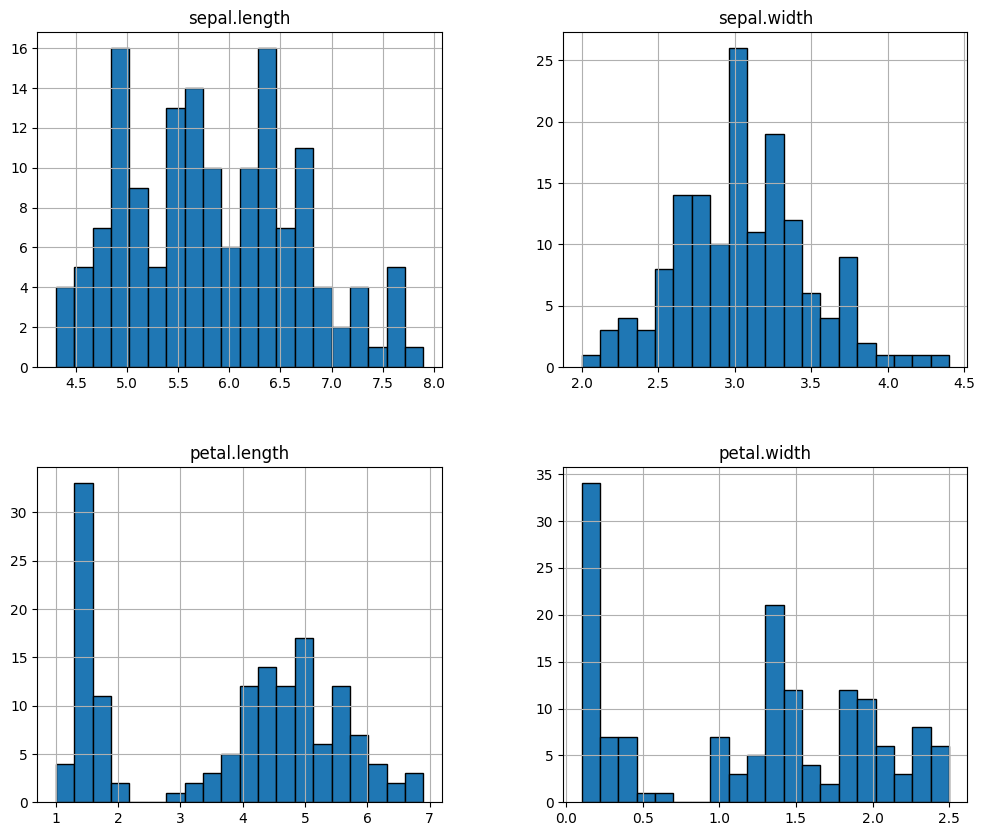

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=20,figsize=(12,10),edgecolor='black')
plt.show()

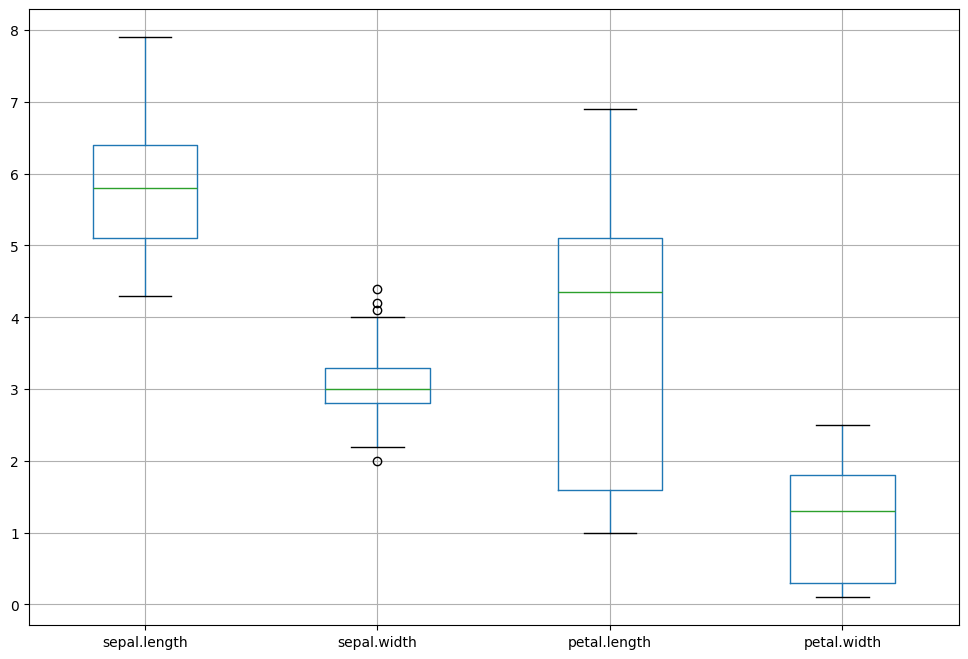

In [12]:
df.boxplot(figsize=(12,8))
plt.show()

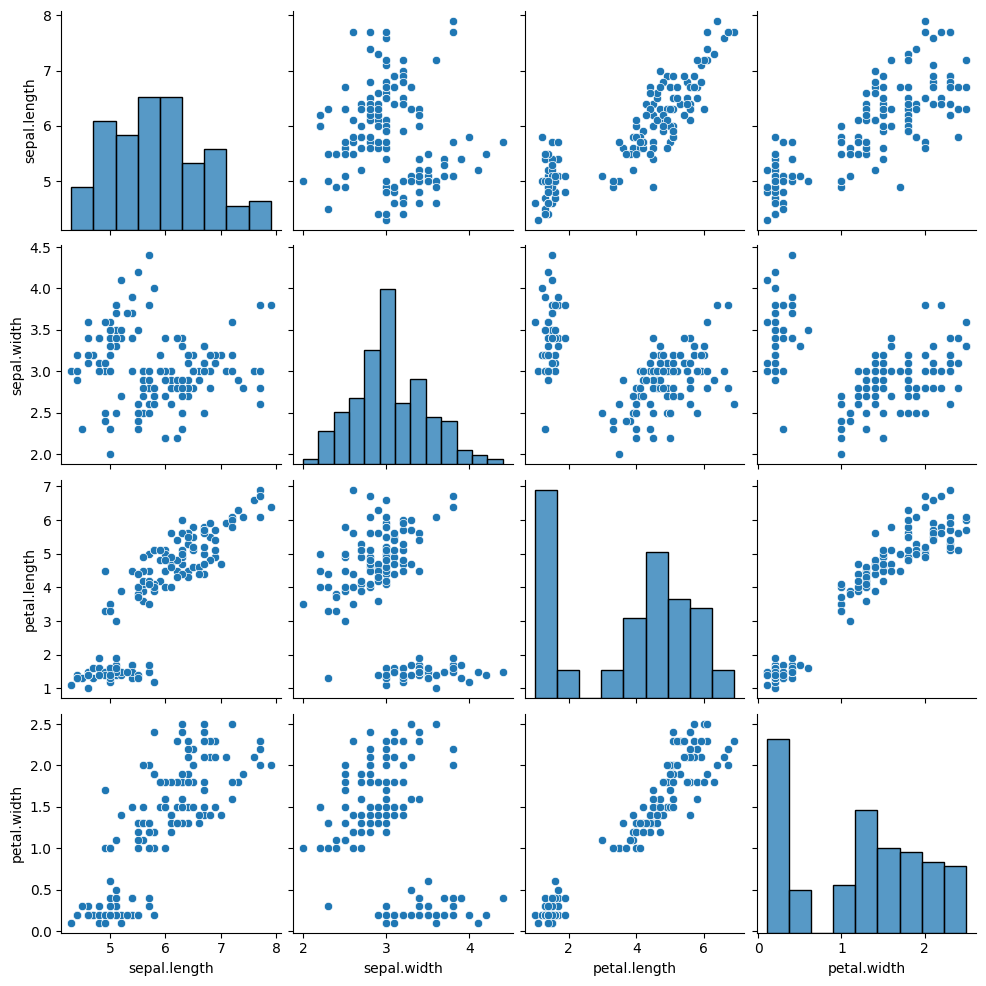

In [13]:
import seaborn as sns
sns.pairplot(df)
plt.show()

In [15]:
# Feature Extraction
x=df.iloc[:,:-1]
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y=df['variety']
y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [18]:
#step-5 : train test split model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [27]:
#step-6 : EDA2
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [28]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_test,y_test)

GaussianNB()

In [29]:
#step-7 : model building and model evaluation
y_pred=model.predict(x_train)
y_pred

array(['Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Versicolor',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Setosa', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor',

In [30]:
y_pred1=model1.predict(x_test)
y_pred1

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype='<U10')

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_train,y_pred)
cm

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  3, 36]])

In [33]:
accuracy_score(y_train,y_pred)

0.95

In [34]:
confusion_matrix(y_test,y_pred1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [35]:
accuracy_score(y_test,y_pred1)

1.0

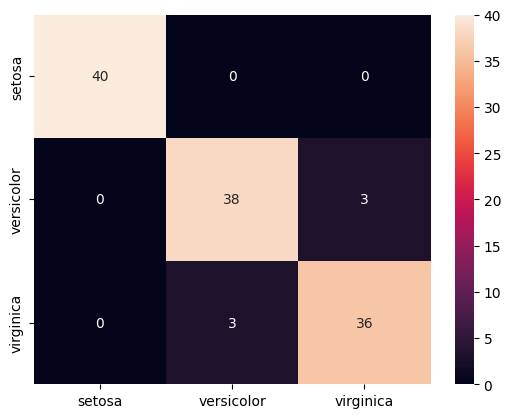

In [37]:
sns.heatmap(cm,annot=True,xticklabels=['setosa','versicolor','virginica'],yticklabels=['setosa','versicolor','virginica'])
plt.show()

In [39]:
from sklearn.metrics import classification_report
classification_report(y_train,y_pred)

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        40\n  Versicolor       0.93      0.93      0.93        41\n   Virginica       0.92      0.92      0.92        39\n\n    accuracy                           0.95       120\n   macro avg       0.95      0.95      0.95       120\nweighted avg       0.95      0.95      0.95       120\n'

In [41]:
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        10\n  Versicolor       1.00      1.00      1.00         9\n   Virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [ ]:
#Infer 100 percent accuracy: Excellent model
#acuracy_score : 100 percent
#F1SCORE:100
#SETOSA = 36 percent
#verginca = 43 percent
# versicolor = 20 percent